# Case study on Unsupervised Learning


# 1. Read the dataset to the python environment.

In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [122]:
wine=pd.read_csv(r"C:\Users\DELL\Downloads\Wine (2).csv")
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [123]:
%whos

Variable                  Type                       Data/Info
--------------------------------------------------------------
AgglomerativeClustering   type                       <class 'sklearn.cluster._<...>AgglomerativeClustering'>
KMeans                    type                       <class 'sklearn.cluster._kmeans.KMeans'>
PCA                       ABCMeta                    <class 'sklearn.decomposition._pca.PCA'>
StandardScaler            type                       <class 'sklearn.preproces<...>ng._data.StandardScaler'>
Z                         ndarray                    177x4: 708 elems, type `float64`, 5664 bytes
ax1                       Axes                       Axes(0,0;1x1)
ax2                       Axes                       Axes(1.09,0;1x1)
ax3                       Axes                       Axes(0,1.2;1x1)
ax4                       Axes                       Axes(1.09,1.2;1x1)
cluster                   ndarray                    178: 178 elems, type `int32`, 712 bytes

In [124]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [125]:
wine.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [126]:
wine.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [127]:
wine.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [128]:
wine.shape

(178, 13)

In [129]:
wine.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

# 2. Try out different clustering models in the wine dataset.

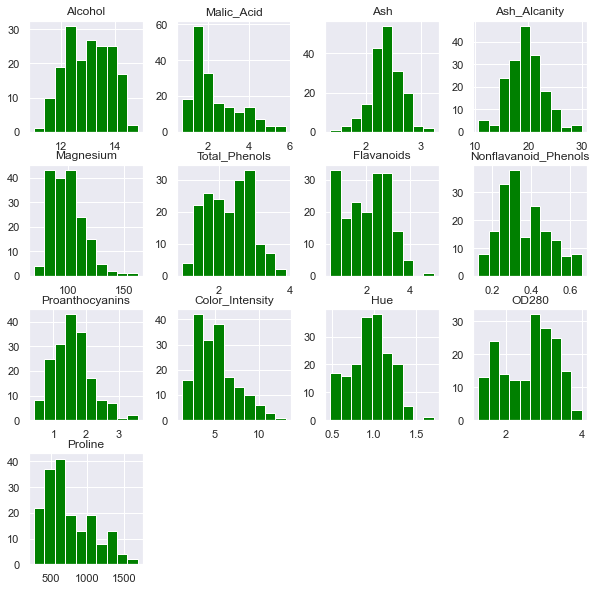

In [130]:
#Checking distribution of data
sns.set()
wine.hist(figsize=(10,10), color='green')
plt.show()

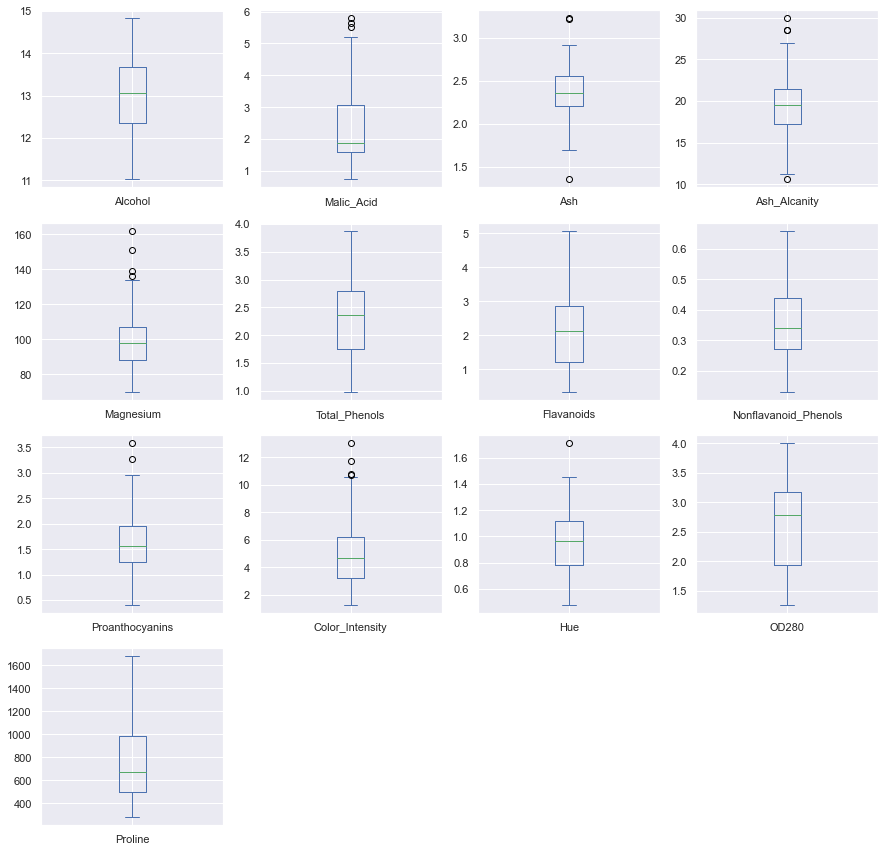

In [131]:
 #Exploratory data analysis
wine.plot(kind="box", subplots = True,layout = (4,4),figsize=(15,15))
plt.show()

<Axes:xlabel='Total_Phenols', ylabel='Density'>

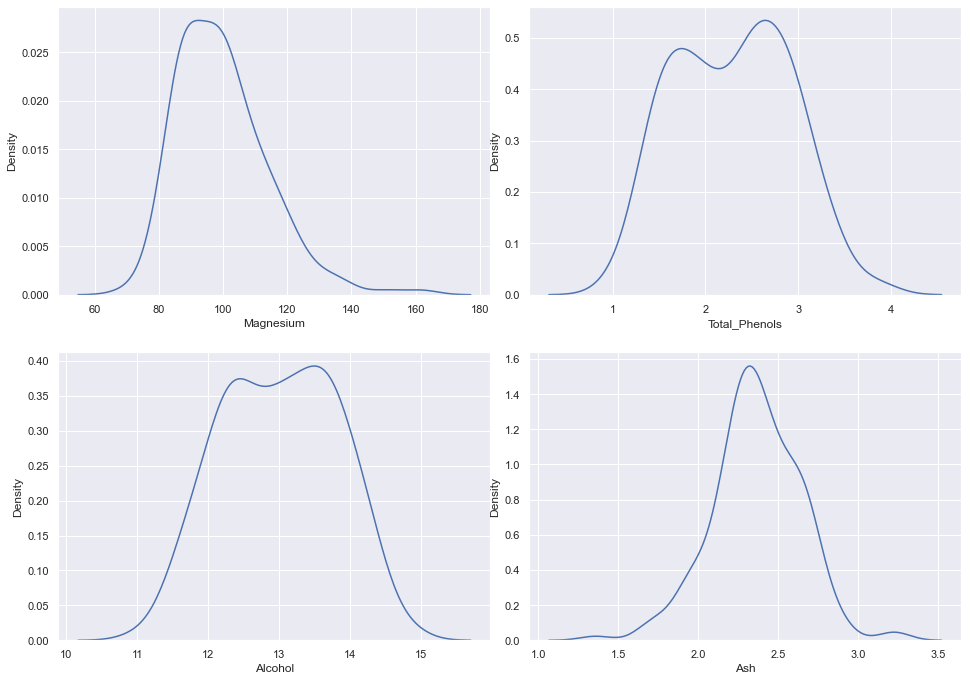

In [132]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])
sns.kdeplot(data=wine,x='Alcohol')
ax2 = fig.add_axes([1.09,0,1,1])
sns.kdeplot(data=wine,x='Ash')
ax3 = fig.add_axes([0,1.2,1,1])
sns.kdeplot(data=wine,x='Magnesium')
ax4 = fig.add_axes([1.09,1.2,1,1])
sns.kdeplot(data=wine,x='Total_Phenols') 

<Axes:xlabel='Color_Intensity', ylabel='Density'>

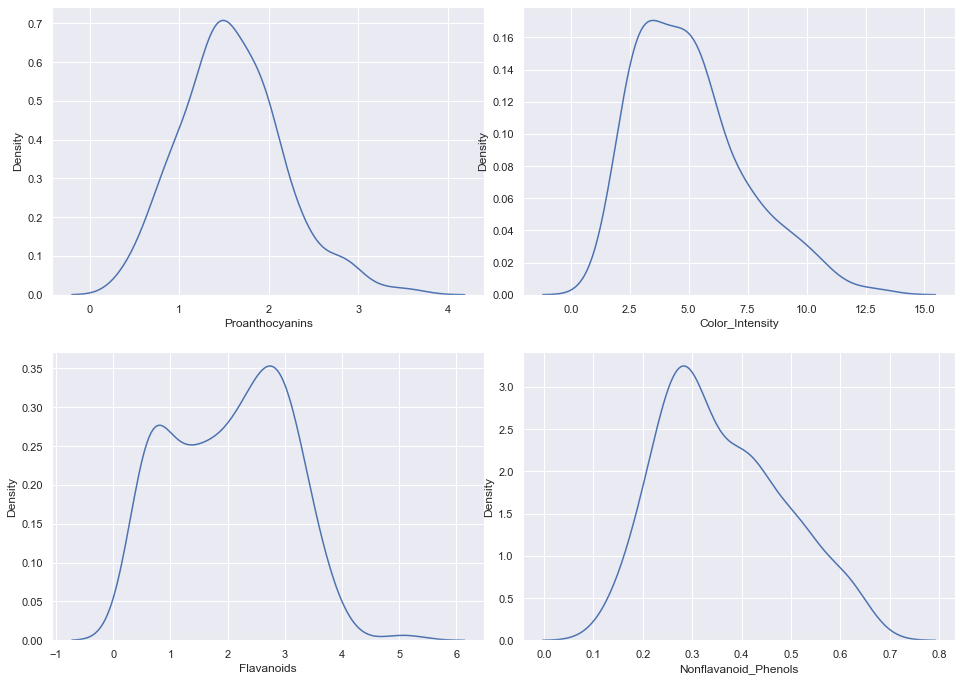

In [133]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])
sns.kdeplot(data=wine,x='Flavanoids')
ax2 = fig.add_axes([1.09,0,1,1])
sns.kdeplot(data=wine,x='Nonflavanoid_Phenols')
ax3 = fig.add_axes([0,1.2,1,1])
sns.kdeplot(data=wine,x='Proanthocyanins')
ax4 = fig.add_axes([1.09,1.2,1,1])
sns.kdeplot(data=wine,x='Color_Intensity')

In [134]:
#Standadization
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_X = scale.fit_transform(wine)
scaled_X = pd.DataFrame(data=scaled_X,columns=wine.columns)
scaled_X

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


CLUSTERS

In [84]:
from sklearn.cluster import KMeans

kmeans = KMeans(3)
kmeans

KMeans(n_clusters=3)

In [85]:
pred = kmeans.fit_predict(wine)
pred

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0])

In [86]:
wine['K_means_Cluster'] = pred
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,K_means_Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


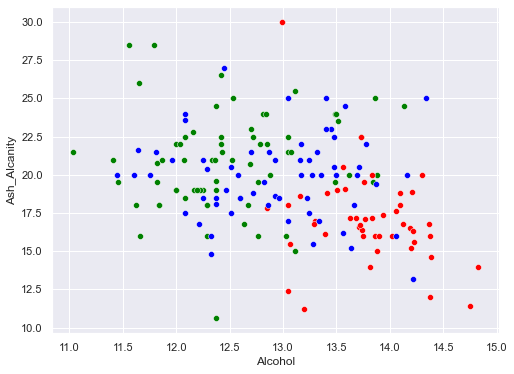

In [87]:
wine1 = wine[wine['K_means_Cluster']==0]
wine2 = wine[wine['K_means_Cluster']==1]
wine3 = wine[wine['K_means_Cluster']==2]

plt.figure(figsize=(8, 6))

sns.scatterplot(x='Alcohol', y='Ash_Alcanity', data=wine1, color='green')
sns.scatterplot(x='Alcohol', y='Ash_Alcanity', data=wine2, color='red')
sns.scatterplot(x='Alcohol', y='Ash_Alcanity', data=wine3, color='blue')

# sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='purple', marker='*')


plt.xlabel('Alcohol')
plt.ylabel('Ash_Alcanity')

plt.show()

In [88]:
kmeans.cluster_centers_

array([[1.25166667e+01, 2.49420290e+00, 2.28855072e+00, 2.08231884e+01,
        9.23478261e+01, 2.07072464e+00, 1.75840580e+00, 3.90144928e-01,
        1.45188406e+00, 4.08695651e+00, 9.41159420e-01, 2.49072464e+00,
        4.58231884e+02],
       [1.38044681e+01, 1.88340426e+00, 2.42617021e+00, 1.70234043e+01,
        1.05510638e+02, 2.86723404e+00, 3.01425532e+00, 2.85319149e-01,
        1.91042553e+00, 5.70255319e+00, 1.07829787e+00, 3.11404255e+00,
        1.19514894e+03],
       [1.29298387e+01, 2.50403226e+00, 2.40806452e+00, 1.98903226e+01,
        1.03596774e+02, 2.11112903e+00, 1.58403226e+00, 3.88387097e-01,
        1.50338710e+00, 5.65032258e+00, 8.83967742e-01, 2.36548387e+00,
        7.28338710e+02]])

Elbow method

In [135]:
k_rng = range(1,10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(wine[['Alcohol', 'Ash_Alcanity']])
    sse.append(km.inertia_)

In [136]:
sse

[2090.6794814606747,
 880.6855821900403,
 505.50240122380006,
 357.3823442122688,
 255.69170891443716,
 201.48238861292577,
 164.7416670310041,
 141.44688181664827,
 120.04719954740544]

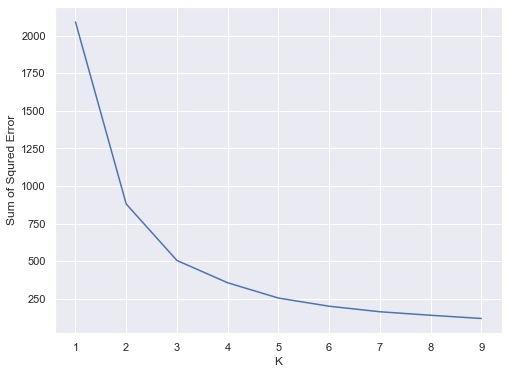

In [137]:
# Elbow Plot

fig = plt.figure(figsize=(8,6))

plt.xlabel('K')
plt.ylabel('Sum of Squred Error')
plt.plot(k_rng,sse)

From Elbow Method it is Clear that we have 3 Clusters

2. Hierarchial (Agglomerative Clustering)

In [138]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [139]:
points = wine[['Alcohol', 'Ash_Alcanity']]

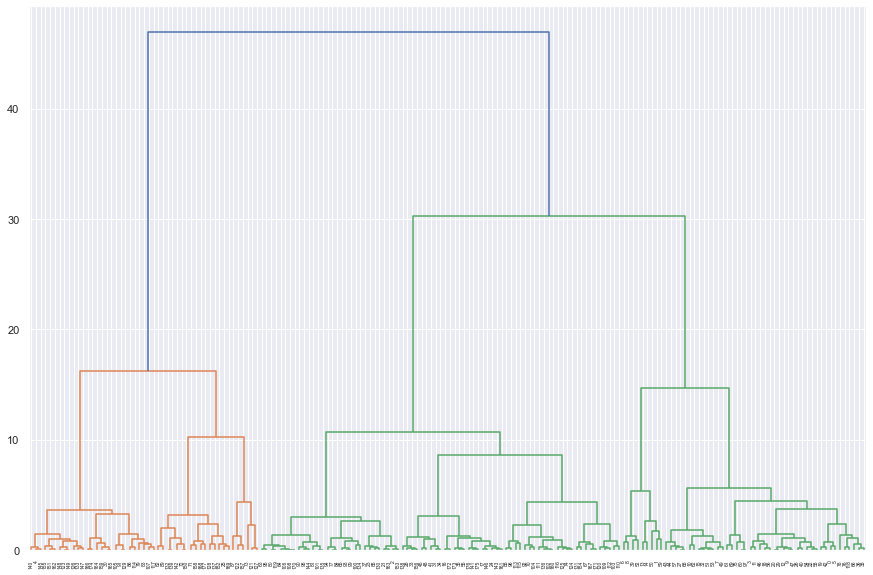

In [140]:
# Create a dendrogram

fig = plt.figure(figsize=(15,10))

dendrogram = sch.dendrogram(sch.linkage(points, method='ward'))

In [141]:
#  Perform a clstering

hc = AgglomerativeClustering(3)
hc

AgglomerativeClustering(n_clusters=3)

In [142]:
pred = hc.fit_predict(wine)
pred

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1], dtype=int64)

In [143]:
wine['Hierarchical_Cluster'] = pred
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Hierarchical_Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [144]:
wine1 = wine[wine['Hierarchical_Cluster']==0]
wine2 = wine[wine['Hierarchical_Cluster']==1]
wine3 = wine[wine['Hierarchical_Cluster']==2]

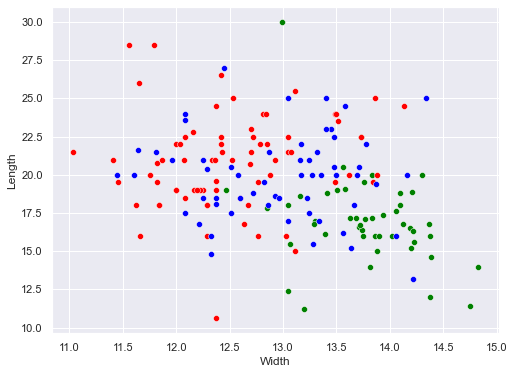

In [151]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x='Alcohol', y='Ash_Alcanity', data=wine1, color='green')
sns.scatterplot(x='Alcohol', y='Ash_Alcanity', data=wine2, color='red')
sns.scatterplot(x='Alcohol', y='Ash_Alcanity', data=wine3, color='blue')

plt.xlabel('Width')
plt.ylabel('Length')

plt.show()

In [152]:
sb.shape

(178, 4)

In [153]:
km = sb['K_means_Cluster'].value_counts()
hc = sb['Hierarchical_Cluster'].value_counts()
hc


1    72
2    58
0    48
Name: Hierarchical_Cluster, dtype: int64

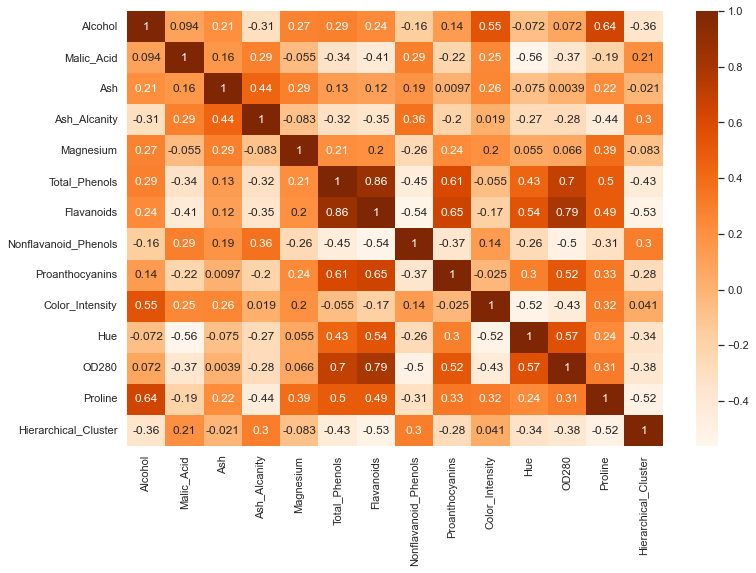

In [154]:
plt.figure(figsize=(12,8))
sns.heatmap(wine.corr(),annot = True,cmap='Oranges')
plt.show()